Importing Dependencies and also importing our Pretrained Model from TensorflowHub

In [10]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

Preprocessing Images and Loading it

In [11]:
model=hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [12]:
def load_image(img_path):
  img=tf.io.read_file(img_path)
  img=tf.image.decode_image(img,channels=3)
  img=tf.image.convert_image_dtype(img,tf.float32)
  img=img[tf.newaxis,:]
  return img

In [13]:
content_image=load_image('wave.jpg')
style_image=load_image('van.jpeg')

Visualizing the Output

In [14]:
content_image.shape

TensorShape([1, 400, 616, 3])

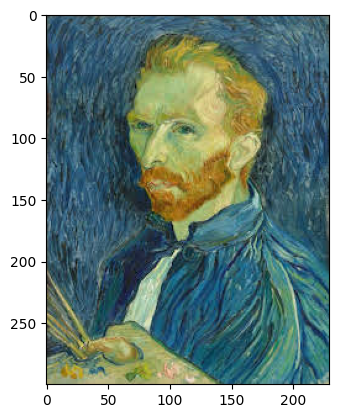

In [15]:
plt.imshow(np.squeeze(style_image))
plt.show()

Styling the Output Image

In [16]:
styling_image=model(tf.constant(content_image),tf.constant(style_image))[0]

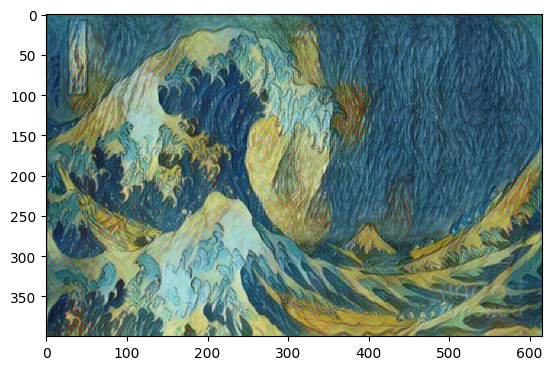

In [17]:
plt.imshow(np.squeeze(styling_image))
plt.show()

Downloading the Generated Image using CV

In [18]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(styling_image)*255, cv2.COLOR_BGR2RGB))

True